# Import libraries

In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
import torch, torchvision 
from torch import nn
from torch import optim

(512, 640, 3)


(-0.5, 639.5, 511.5, -0.5)

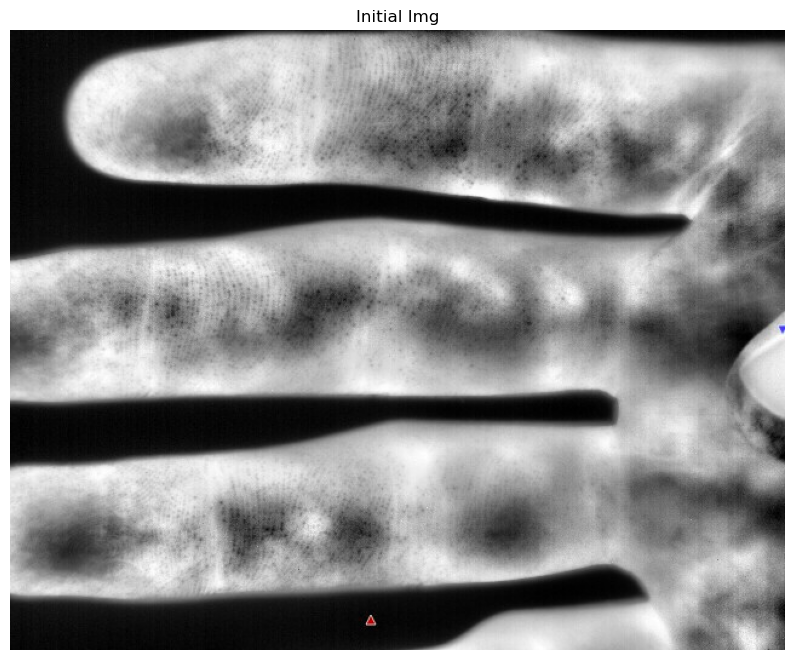

In [5]:
# Import data 
image_path = '/Users/rickysu/Projects/sweatPoresActivation/input_images/raw/8.bmp'
img = cv2.imread(image_path)

print(img.shape)

# show the image 
plt.figure(figsize = (10, 10))
plt.imshow(img, cmap = 'gray')
plt.title("Initial Img")
plt.axis("off")

In [14]:
class ConvNeuralNet(nn.Model):
    def __init__():
        pass
    

AttributeError: module 'torch.nn' has no attribute 'Model'

In [6]:
print(type(contours))

<class 'tuple'>


# Morphological operation 

(-0.5, 2559.5, 2047.5, -0.5)

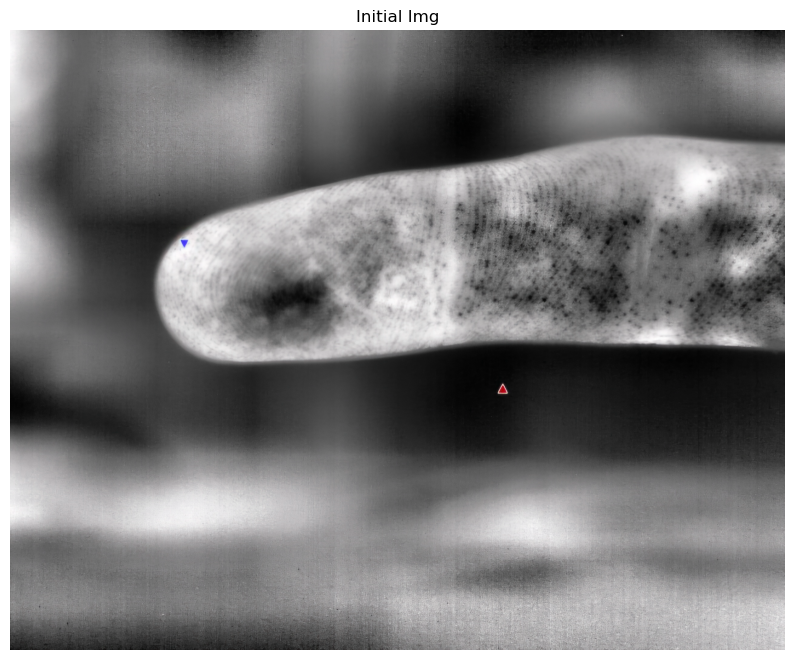

In [35]:
image_path = '/Users/rickysu/Projects/sweatPoresActivation/images/1.bmp'
img = cv2.imread(image_path)

# show the image 
plt.figure(figsize = (10, 10))
plt.imshow(img, cmap = 'gray')
plt.title("Initial Img")
plt.axis("off")

In [45]:
def top_hat_transform(image, kernel_size=(5,5)):
    # Ensure image is grayscale
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Ensure image is 8-bit
    if image.dtype != np.uint8:
        image = (image * 255).astype(np.uint8)
    
    # Create a structuring element
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)
    
    # Perform Top Hat operation
    top_hat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
    
    return top_hat

In [46]:
def enhanced_top_hat(image, kernel_size=(5,5), clip_limit=2.0, tile_grid_size=(8,8)):
    # Perform Top Hat
    top_hat = top_hat_transform(img, kernel_size)
    
    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    enhanced = clahe.apply(top_hat)
    
    return enhanced

Text(0.5, 1.0, 'Top Hat Operation')

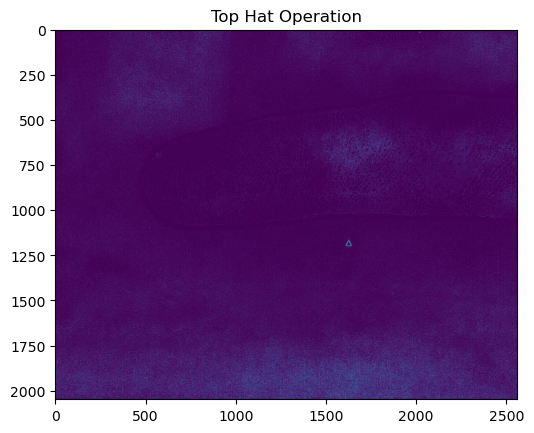

In [47]:
top_hat_img = enhanced_top_hat(img)

plt.imshow(top_hat_img);plt.title("Top Hat Operation")